# In this practice session, we will learn to code Naive Bayes Classifier. 
# We will perform the following steps to build a simple classifier using the popular Iris dataset.

 
 
  - **Data Preprocessing**

    - Importing the libraries.
    - Importing dataset (Dataset Link https://archive.ics.uci.edu/ml/datasets/iris).
    - Dealing with the categorical variable.
    - Classifying dependent and independent variables.
    - Splitting the data into a training set and test set.
    - Feature scaling.
 

  -  **Naive-Bayes Classification**

    - Create a Naive-Bayes classifier.
    - Feed the training data to the classifier.
    - Predicting the species for the test set.
    - Using the confusion matrix to find accuracy.

Naive Bayes Classification is a probabilistic Machine Learning algorithm that makes use of the Bayes Theorem for predicting categorical features. Bayes Theorem describes the probability of an event, based on prior knowledge of conditions that might be related to the event. The Bayes theorem has various applications in Machine Learning the most poplar being Text classification. Categorizing a mail as spam or important is one simple and very popular application of the Bayes classification.

# Load the Dependencies

In [1]:
import ipywidgets as widgets
from IPython.display import display

style = {'description_width': 'initial'}

In [2]:
#1 Importing essential libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns

# Load the Dataset

In [3]:
file_name = 'iris.data'

#Importing dataset
dataset = pd.read_csv('dataset/iris.csv', skiprows = 1, delimiter=',', names=['sepal length', 'sepal width', \
                                                       'petal length', "petal width",
                                                      'Species'])

dataset.head()

,sepal length,sepal width,petal length,petal width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
print(f"Dataset has {dataset.shape[0]} rows and {dataset.shape[1]} columns.")

Dataset has 150 rows and 5 columns.


In [5]:
#Plotting the relation between salary and experience
wig_col = widgets.Dropdown(
                options=[col for col in dataset.columns.tolist() if col.startswith(('sepal', 'petal'))],
                description='Choose a Column to Plot vs. Attributes',
                disabled=False,
                layout=widgets.Layout(width='40%', height='40px'),
                style=style)

# Plot Variables

Dropdown(description='Choose a Column to Plot vs. Attributes', layout=Layout(height='40px', width='40%'), opti…

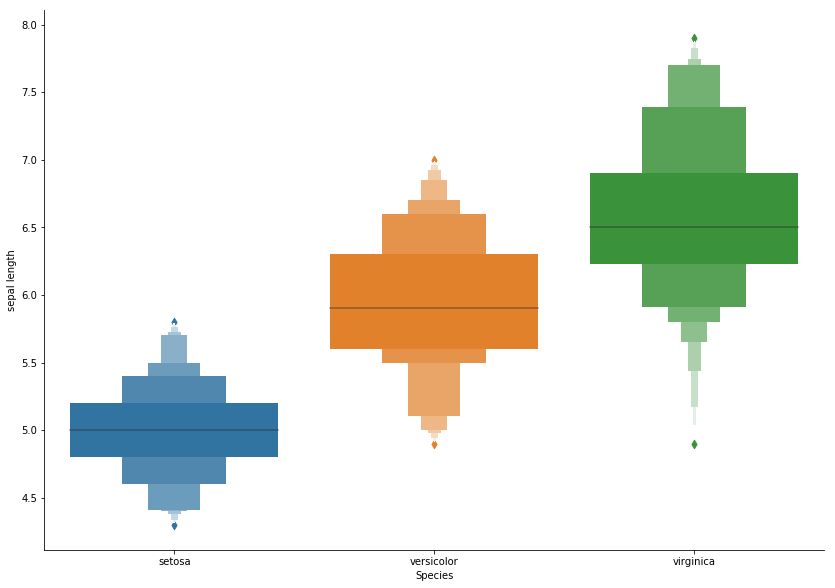

In [6]:
display(wig_col)

sns.catplot(x="Species", y=wig_col.value, kind="boxen", data=dataset, height=8.27, aspect=11.7/8.27);

Dropdown(description='Choose a Column to Plot vs. Attributes', layout=Layout(height='40px', width='40%'), opti…

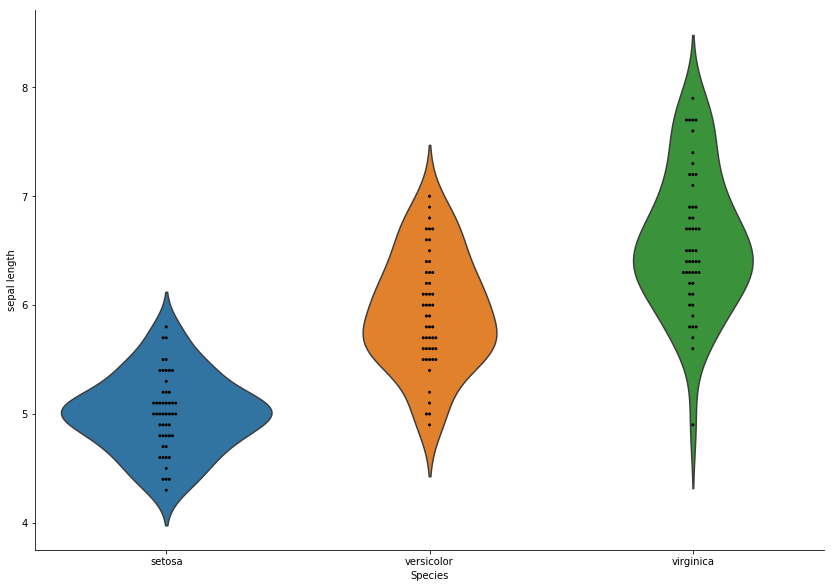

In [7]:
g = sns.catplot(x="Species", y=wig_col.value, kind="violin", inner=None, data=dataset, height=8.27, aspect=11.7/8.27)
sns.swarmplot(x="Species", y=wig_col.value, color="k", size=3, data=dataset, ax=g.ax);

display(wig_col)

In [8]:
#3 classify dependent and independent variables
X = dataset.iloc[:,:-1].values  #independent variable YearsofExperience
y = dataset.iloc[:,-1].values  #dependent variable salary

In [9]:
print("\nIdependent Variable (Sepal and Petal Attributes):\n\n", X[:5])
print("\nDependent Variable (Species):\n\n", y[:5])


Idependent Variable (Sepal and Petal Attributes):

 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

Dependent Variable (Species):

 ['setosa' 'setosa' 'setosa' 'setosa' 'setosa']


# Encode Classes

In [10]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
dataset['Species'] = labelencoder.fit_transform(dataset['Species'])

In [11]:
dataset['Species'].unique()

array([0, 1, 2])

# Create Train and Test Sets

In [12]:
#4 Creating training set and testing set
from sklearn.model_selection import train_test_split
test_size = widgets.FloatSlider(min=0.01, max=0.6, value=0.2, description="Test Size :", tooltips=['Usually 20-30%'])
display(test_size)

FloatSlider(value=0.2, description='Test Size :', max=0.6, min=0.01)

In [13]:
#Divide the dataset into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=test_size.value, random_state = 0) 

In [14]:
print("Training Set :\n----------------\n")
print("X = \n", X_train[:5])
print("y = \n", y_train[:5])

print("\n\nTest Set :\n----------------\n")
print("X = \n",X_test[:5])
print("y = \n", y_test[:5])

Training Set :
----------------

X = 
 [[6.4 3.1 5.5 1.8]
 [5.4 3.  4.5 1.5]
 [5.2 3.5 1.5 0.2]
 [6.1 3.  4.9 1.8]
 [6.4 2.8 5.6 2.2]]
y = 
 ['virginica' 'versicolor' 'setosa' 'virginica' 'virginica']


Test Set :
----------------

X = 
 [[5.8 2.8 5.1 2.4]
 [6.  2.2 4.  1. ]
 [5.5 4.2 1.4 0.2]
 [7.3 2.9 6.3 1.8]
 [5.  3.4 1.5 0.2]]
y = 
 ['virginica' 'versicolor' 'setosa' 'virginica' 'setosa']


In [15]:
print(f"Shape of Training set is {X_train.shape}")
print(f"Shape of Testing set is {X_test.shape}")

Shape of Training set is (120, 4)
Shape of Testing set is (30, 4)


# Normalise Features

As the Features are not in the range of 0-1, Let's normalize the features using Standard Scaler(Z-score) normalization and Label Encode the Class String Names.

In [16]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) 

print("\n-------------------------\nDataset after Scaling:\n-------------------------\n", )

print("\nX_train :\n", X_train[:5])
print("-------------------------")
print("\nX_test :\n", X_test[:5])


-------------------------
Dataset after Scaling:
-------------------------


X_train :
 [[ 0.61303014  0.10850105  0.94751783  0.736072  ]
 [-0.56776627 -0.12400121  0.38491447  0.34752959]
 [-0.80392556  1.03851009 -1.30289562 -1.33615415]
 [ 0.25879121 -0.12400121  0.60995581  0.736072  ]
 [ 0.61303014 -0.58900572  1.00377816  1.25412853]]
-------------------------

X_test :
 [[-0.09544771 -0.58900572  0.72247648  1.5131568 ]
 [ 0.14071157 -1.98401928  0.10361279 -0.30004108]
 [-0.44968663  2.66602591 -1.35915595 -1.33615415]
 [ 1.6757469  -0.35650346  1.39760052  0.736072  ]
 [-1.04008484  0.80600783 -1.30289562 -1.33615415]]


# Naive-Bayes Classifier

In [17]:
# import Naive-Bayes library
from sklearn.naive_bayes import GaussianNB

# Predict and Evaluate the Model 

In [18]:
classifier = GaussianNB()

#Feed the training data to the classifier
classifier.fit(X_train,y_train)

#Predicting the species for test set
y_pred = classifier.predict(X_test)

print("\n---------------------------\n")
print("Predicted Values for Test Set :\n",y_pred)
print("\n---------------------------\n")
print("Actual Values for Test Set :\n",y_test)



---------------------------

Predicted Values for Test Set :
 ['virginica' 'versicolor' 'setosa' 'virginica' 'setosa' 'virginica'
 'setosa' 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'setosa' 'versicolor' 'versicolor'
 'setosa' 'setosa' 'virginica' 'versicolor' 'setosa' 'setosa' 'virginica'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'setosa']

---------------------------

Actual Values for Test Set :
 ['virginica' 'versicolor' 'setosa' 'virginica' 'setosa' 'virginica'
 'setosa' 'versicolor' 'versicolor' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'setosa' 'versicolor' 'versicolor'
 'setosa' 'setosa' 'virginica' 'versicolor' 'setosa' 'setosa' 'virginica'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'setosa']


In [19]:
#8 Claculating the Accuracy of the predictions
from sklearn import metrics
print("Prediction Accuracy = ", metrics.accuracy_score(y_test, y_pred))

#9 Comparing Actual and Predicted Salaries for he test set
print("\nActual vs Predicted Salaries \n------------------------------\n")
error_df = pd.DataFrame({"Actual" : y_test,
                         "Predicted" : y_pred})

error_df

Prediction Accuracy =  0.9666666666666667

Actual vs Predicted Salaries 
------------------------------



,Actual,Predicted
0,virginica,virginica
1,versicolor,versicolor
2,setosa,setosa
3,virginica,virginica
4,setosa,setosa
5,virginica,virginica
6,setosa,setosa
7,versicolor,versicolor
8,versicolor,versicolor
9,versicolor,versicolor


# Actual vs. Predicted 

In [20]:
#Using confusion matrix to find the accuracy
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test,y_pred)

accuracy = cm.diagonal().sum()/cm.sum()

print("\n---------------------------\n")
print("Accuracy of Predictions = ",accuracy)

print("\n---------------------------\n")
print(classification_report(y_test, y_pred))


---------------------------

Accuracy of Predictions =  0.9666666666666667

---------------------------

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.93      1.00      0.96        13
   virginica       1.00      0.83      0.91         6

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30

